In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [2]:
#Reading the data set
df = pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


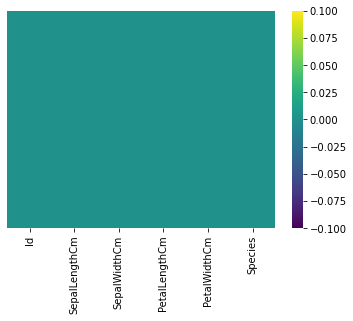

In [9]:
sn.heatmap(df.isnull(),yticklabels = False, cbar = True, cmap = 'viridis');

In [7]:
df.shape

(150, 6)

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.drop('Id',axis = 1, inplace = True)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Detecting outliers

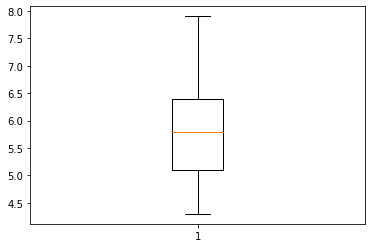

In [12]:
plt.boxplot(df['SepalLengthCm']);

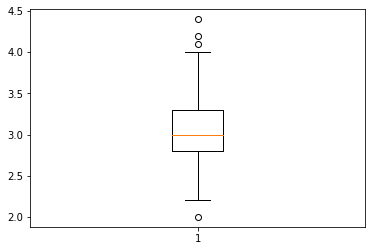

In [13]:
plt.boxplot(df['SepalWidthCm']);

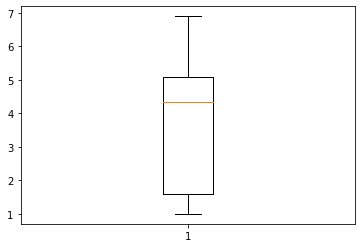

In [14]:
plt.boxplot(df['PetalLengthCm']);

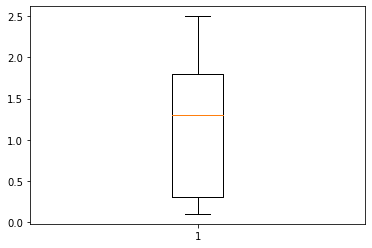

In [15]:
plt.boxplot(df['PetalWidthCm']);

### Removing the outliers

In [16]:
df['zscore'] = ((df.SepalWidthCm - df.SepalWidthCm.mean()) / df.SepalWidthCm.std())
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,zscore
0,5.1,3.5,1.4,0.2,Iris-setosa,1.028611
1,4.9,3.0,1.4,0.2,Iris-setosa,-0.124540
2,4.7,3.2,1.3,0.2,Iris-setosa,0.336720
3,4.6,3.1,1.5,0.2,Iris-setosa,0.106090
4,5.0,3.6,1.4,0.2,Iris-setosa,1.259242


In [17]:
print("THE OUTLIERS ARE :")
df[ (df.zscore <-2) | (df.zscore >2)]

THE OUTLIERS ARE :


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,zscore
14,5.8,4.0,1.2,0.2,Iris-setosa,2.181763
15,5.7,4.4,1.5,0.4,Iris-setosa,3.104284
32,5.2,4.1,1.5,0.1,Iris-setosa,2.412393
33,5.5,4.2,1.4,0.2,Iris-setosa,2.643024
60,5.0,2.0,3.5,1.0,Iris-versicolor,-2.430844


### Removing the outliers

In [18]:
x =  df[(df.zscore > -2) & (df.zscore < 2)]
print(x.shape)
x.head()

(145, 6)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,zscore
0,5.1,3.5,1.4,0.2,Iris-setosa,1.028611
1,4.9,3.0,1.4,0.2,Iris-setosa,-0.124540
2,4.7,3.2,1.3,0.2,Iris-setosa,0.336720
3,4.6,3.1,1.5,0.2,Iris-setosa,0.106090
4,5.0,3.6,1.4,0.2,Iris-setosa,1.259242


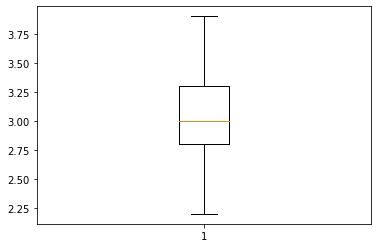

In [19]:
plt.boxplot(x['SepalWidthCm']);

In [32]:
x.groupby('Species').size()

Species
Iris-setosa        46
Iris-versicolor    49
Iris-virginica     50
dtype: int64

In [21]:
feature_columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']
X = x[feature_columns].values
y = x['Species'].values

### Encoding the data

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [23]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Splitting the dataset

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 5)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
knn.predict(X_test)[0:5]

array([0, 0, 0, 1, 1])

In [27]:
knn.score(X_test, y_test)

0.9655172413793104

### Hypertuning model parameters using GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [29]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 6}

In [30]:
knn_gscv.best_score_

0.9793103448275863